# <center> 2.2 EDA avanzado con Seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set()

import matplotlib.pyplot as plt

## ÍNDICE

1. [Dataset](#1.-Dataset)
2. [Univariate visualization](#2.-Univariate-visualization)
    * 2.1 [Quantitative features](#2.1-Quantitative-features)
    * 2.2 [Categorical and binary features](#2.2-Categorical-and-binary-features)
3. [Multivariate visualization](#3.-Multivariate-visualization)
    * 3.1 [Quantitative vs. Quantitative](#3.1-Quantitative-vs.-Quantitative)
    * 3.2 [Quantitative vs. Categorical](#3.2-Quantitative-vs.-Categorical)
    * 3.3 [Categorical vs. Categorical](#3.3-Categorical-vs.-Categorical)
4. [Whole dataset visualizations](#4.-Whole-dataset-visualizations)
    * 4.1 [Naive approach](#4.1-A-naive-approach)
    * 4.2 [Dimensionality reduction](#4.2-Dimensionality-reduction)
    * 4.3 [t-SNE](#4.3-t-SNE)
5. [Demo assignment](#6.-Demo-assignment)
6. [Useful resources](#6.-Useful-resources)

## 1. Dataset

In [2]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
!wget -P ./../data/ https://raw.githubusercontent.com/CenticMurcia/curso-ciencia-datos/master/data/telecom_churn.csv

--2020-11-05 04:10:53--  https://raw.githubusercontent.com/CenticMurcia/curso-ciencia-datos/master/data/telecom_churn.csv
Cargado certificado CA '/etc/ssl/certs/ca-certificates.crt'
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.192.133, 151.101.64.133, 151.101.128.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[151.101.192.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 279997 (273K) [text/plain]
Grabando a: “./../data/telecom_churn.csv.1”

telecom_churn.csv.1 100%[===================>] 273,43K  --.-KB/s    en 0,09s   

2020-11-05 04:10:54 (2,90 MB/s) - “./../data/telecom_churn.csv.1” guardado [279997/279997]



In [2]:
df = pd.read_csv('../data/telecom_churn.csv')
print(df.shape)
df.head()

(3333, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


|  Name  | Description | Value Type | Statistical Type |
|---         |---       |---     |---
| **State** | State abbreviation (like KS = Kansas) | String | Categorical |
| **Account length** | How long the client has been with the company | Numerical | Quantitative |
| **Area code** | Phone number prefix | Numerical | Categorical |
| **International plan** | International plan (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Voice mail plan** | Voicemail (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Number vmail messages** | Number of voicemail messages | Numerical | Quantitative |
| **Total day minutes** |  Total duration of daytime calls | Numerical | Quantitative |
| **Total day calls** | Total number of daytime calls  | Numerical | Quantitative |
| **Total day charge** | Total charge for daytime services | Numerical | Quantitative |
| **Total eve minutes** | Total duration of evening calls | Numerical | Quantitative |
| **Total eve calls** | Total number of evening calls | Numerical | Quantitative |
| **Total eve charge** | Total charge for evening services | Numerical | Quantitative |
| **Total night minutes** | Total duration of nighttime calls | Numerical | Quantitative |
| **Total night calls** | Total number of nighttime calls | Numerical | Quantitative |
| **Total night charge** | Total charge for nighttime services | Numerical | Quantitative |
| **Total intl minutes** | Total duration of international calls  | Numerical | Quantitative |
| **Total intl calls** | Total number of international calls | Numerical | Quantitative |
| **Total intl charge** | Total charge for international calls | Numerical | Quantitative |
| **Customer service calls** | Number of calls to customer service | Numerical | Categorical/Ordinal |

In [3]:
df['Area code'] = df['Area code'].astype(object)

## Análisis de varaibles categóricas:  `.countplot()`

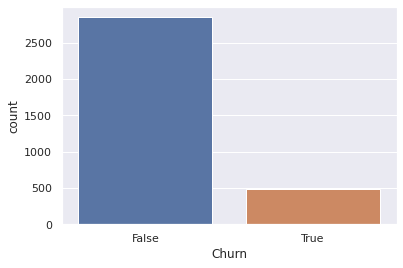

In [4]:
sb.countplot(x='Churn', data=df);

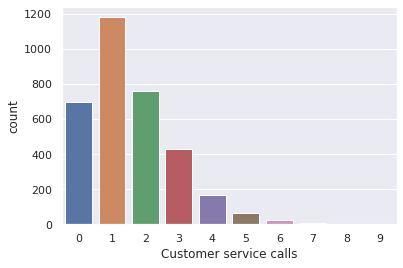

In [5]:
sb.countplot(x='Customer service calls', data=df);

### Análisis de varaibles numéricas: `.histplot()`, `.boxplot()` y `.violinplot()`

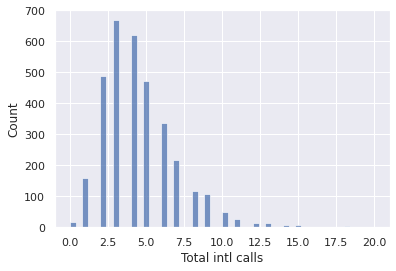

In [6]:
sb.histplot(df['Total intl calls']);

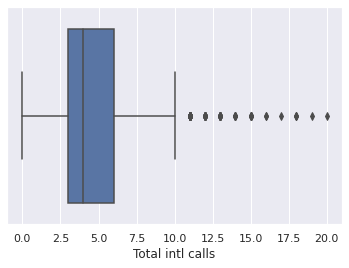

In [7]:
sb.boxplot(x='Total intl calls', data=df);

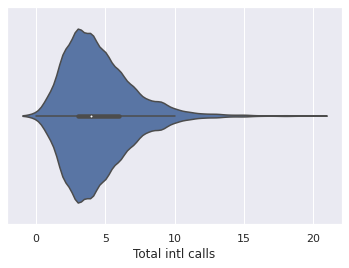

In [8]:
sb.violinplot(x="Total intl calls", data=df);

In [9]:
# Variables numéricas
def plot_num(variable, title="", min=False, max=False, zeros=True, size=(16,4)):
    if not zeros:
        variable=variable[variable!=0]
        title += " (no zeros)"
    if min:
        variable = variable[variable >= min]
        title += " (min: "+str(min)+")"
    if max:
        variable = variable[variable <= max]
        title += " (max: "+str(max)+")"
    fig, ax = plt.subplots(figsize=size)
    ax.set_title(title, fontsize=20)
    ax2 = ax.twinx()
    sb.violinplot(variable, cut=0, palette="Set3", inner="box", ax=ax)
    sb.scatterplot(variable, y=variable.index, color="grey", linewidth=0, s=20, alpha=.3, ax=ax2).invert_yaxis()


def plot_num2(variable, title="", min=False, max=False, zeros=True, size=(16,4)):
    if not zeros:
        variable=variable[variable!=0]
        title += " (no zeros)"
    if min:
        variable = variable[variable >= min]
        title += " (min: "+str(min)+")"
    if max:
        variable = variable[variable <= max]
        title += " (max: "+str(max)+")"
    plt.figure(figsize=size)
    sb.violinplot(variable, cut=0, palette="Set3", inner="quart" )
    sb.stripplot(variable, color="grey", alpha=.5).set_title(title, fontsize=20);


# Variables ordinales
def plot_ord(variable, title="", min=False, max=False, zeros=True, size=(16,4)):
    if not zeros:
        variable=variable[variable!=0]
        title += " (no zeros)"
    if min:
        variable = variable[variable >= min]
        title += " (min: "+str(min)+")"
    if max:
        variable = variable[variable <= max]
        title += " (max: "+str(max)+")"
    plt.figure(figsize=size)
    sb.countplot(variable, color='royalblue').set_title(title, fontsize=20);


# Variables categoricas
def plot_cat(variable, title="", top=False, normalize=False, dropna=False, size=(16,4)):
    plt.figure(figsize=size)
    cats = variable.value_counts(normalize=normalize, dropna=dropna)
    if top:
        cats = cats[:top]
        title += " (top "+str(top)+")"
    sb.barplot(x=cats, y=cats.index).set_title(title, fontsize=20);

/usr/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


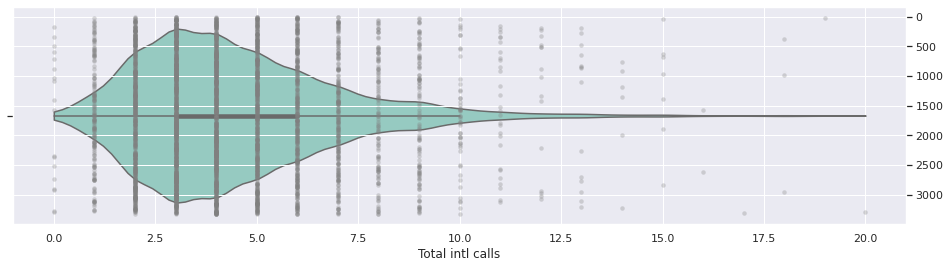

In [10]:
plot_num(df["Total intl calls"])

/usr/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


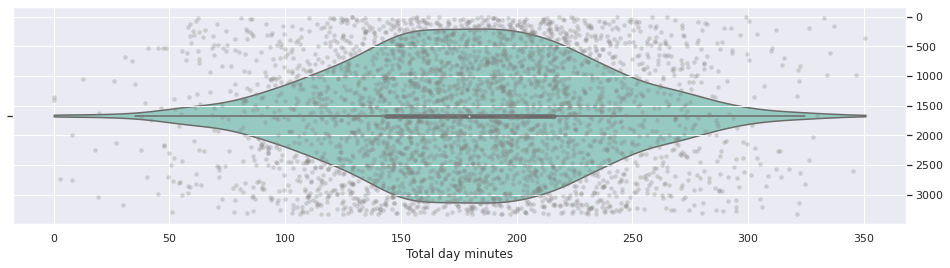

In [11]:
plot_num(df["Total day minutes"])

/usr/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


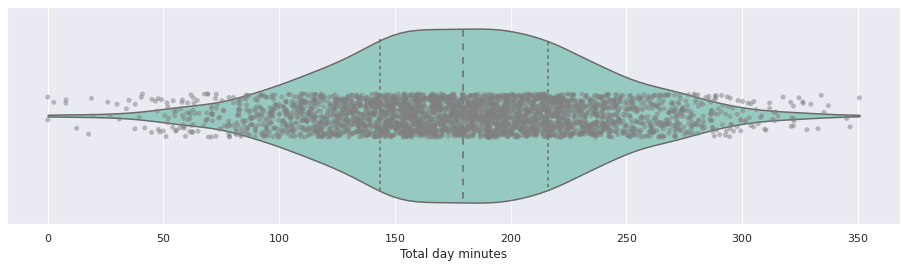

In [12]:
plot_num2(df["Total day minutes"])

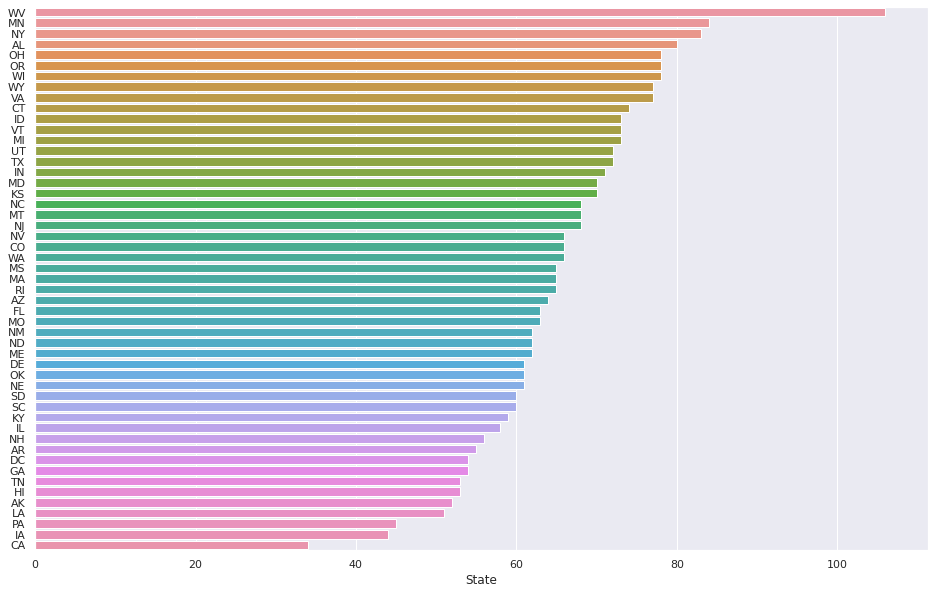

In [13]:
plot_cat(df["State"], size=(16,10))

## 3. Multivariate visualization

## 3.1 Quantitative vs. Quantitative

## Correlation matrix

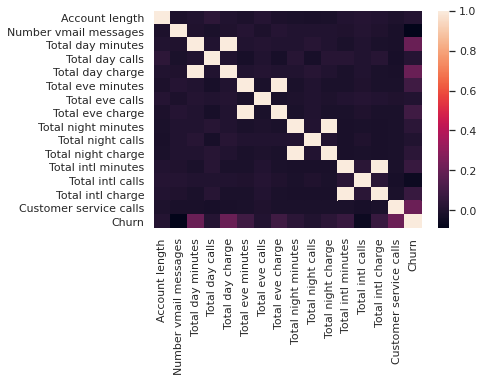

In [14]:
sb.heatmap(df.corr());

In [15]:
import scipy
import scipy.cluster.hierarchy as sch

def cluster_corr(corr_array, inplace=False):
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

<AxesSubplot:>

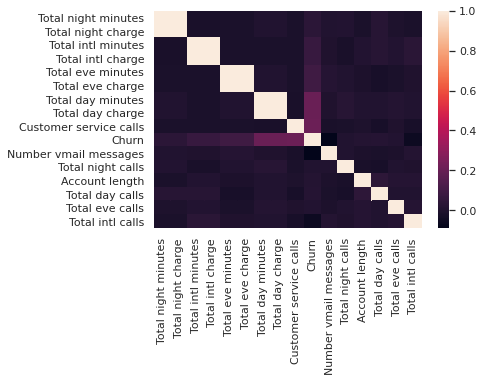

In [16]:
sb.heatmap(cluster_corr(df.corr()))

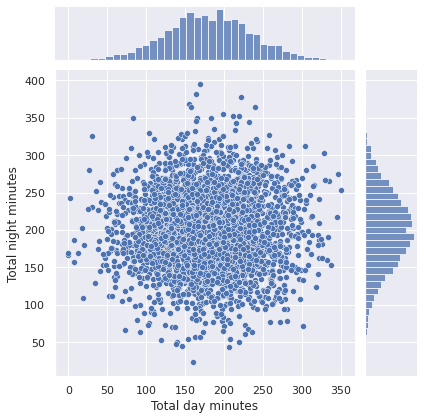

In [17]:
sb.jointplot(x='Total day minutes', y='Total night minutes', data=df, kind='scatter');

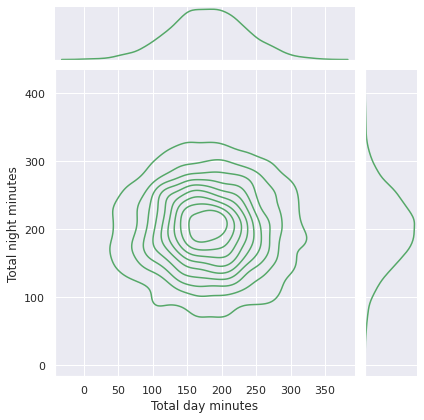

In [18]:
sb.jointplot(x='Total day minutes', y='Total night minutes', data=df, kind="kde", color="g");

In [19]:
#sb.pairplot(df, hue='Churn');

In [20]:
num_vars  = list(df.select_dtypes(exclude=["category", "object", "bool", "datetime64"]).columns)
num_vars

['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

## 3.2 Quantitative vs. Categorical

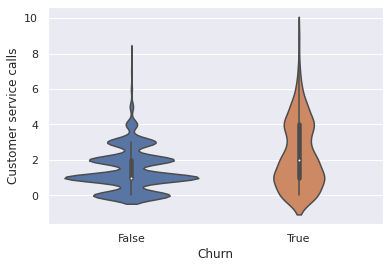

In [22]:
sb.violinplot(x="Churn", y="Customer service calls", data=df);

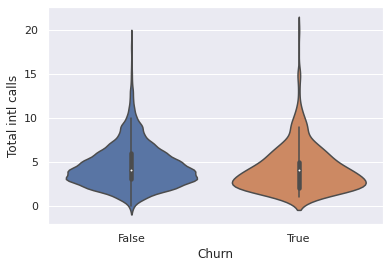

In [21]:
sb.violinplot(x="Churn", y="Total intl calls", data=df);

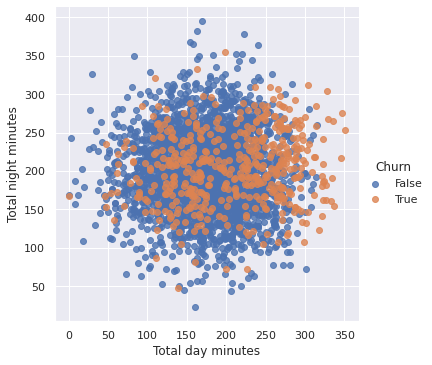

In [24]:
sb.lmplot(x='Total day minutes', y='Total night minutes', data=df, hue='Churn', fit_reg=False);

IndexError: index 3 is out of bounds for axis 0 with size 3

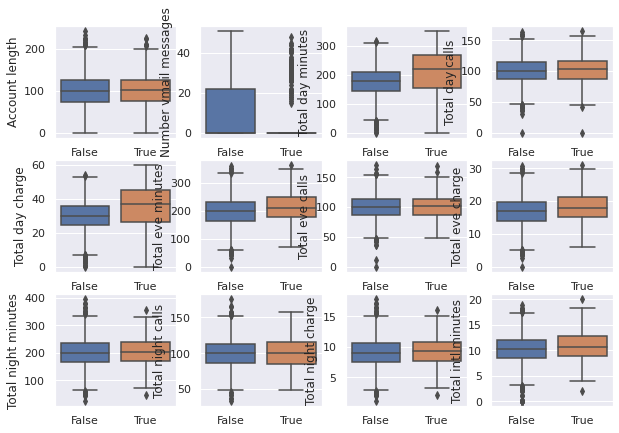

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(num_vars):
    ax = axes[int(idx / 4), idx % 4]
    sb.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

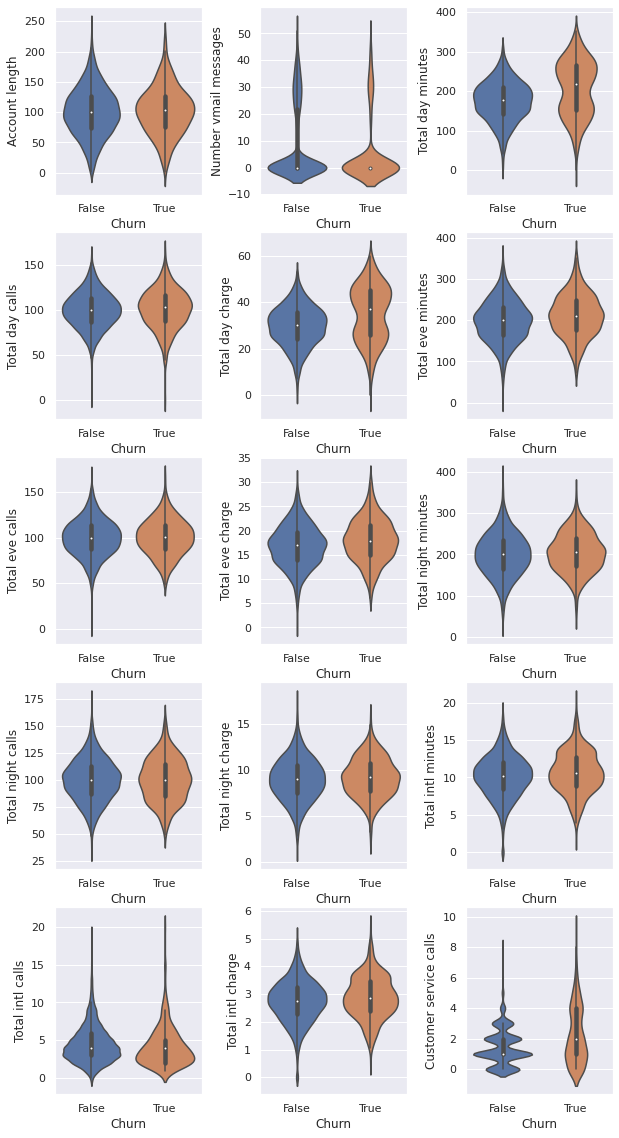

In [29]:
var_quant = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=[10, 20])
plt.subplots_adjust(wspace=0.4)
for i in range(1, len(var_quant)+1):
    plt.subplot(5, 3, i)
    sb.violinplot(x="Churn", y=var_quant[i-1], data=df);

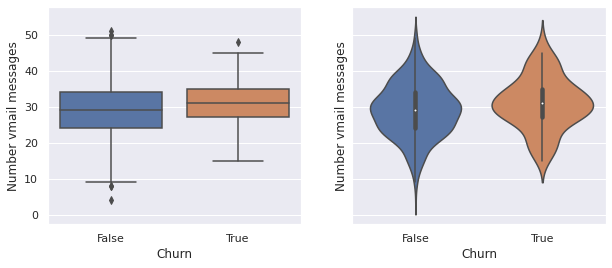

In [31]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sb.boxplot(x='Churn', y='Number vmail messages', 
            data=df[df['Number vmail messages'] > 0], 
            ax=axes[0]);

sb.violinplot(x='Churn', y='Number vmail messages', 
               data=df[df['Number vmail messages'] > 0], 
               ax=axes[1]);

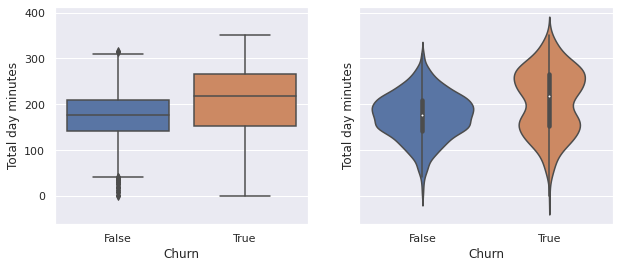

In [32]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sb.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sb.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

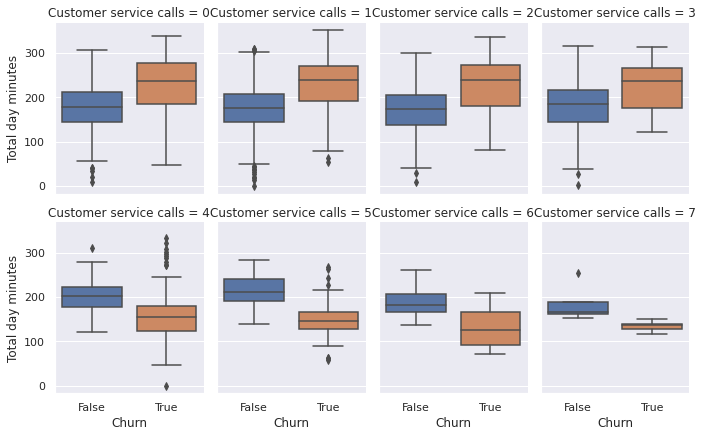

In [33]:
sb.catplot(x='Churn', y='Total day minutes', col='Customer service calls',
               data=df[df['Customer service calls'] < 8], kind="box",
               col_wrap=4, height=3, aspect=.8);

## 3.3 Categorical vs. Categorical

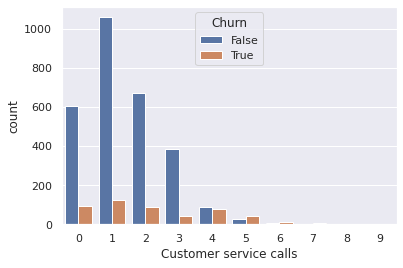

In [34]:
sb.countplot(x='Customer service calls', hue='Churn', data=df);

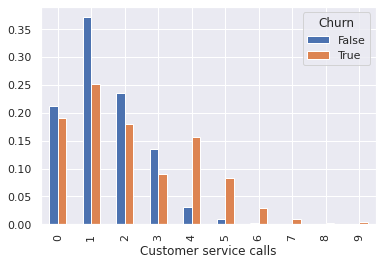

In [35]:
g = df.groupby('Churn')['Customer service calls'].value_counts(normalize=True).unstack().transpose().plot.bar()

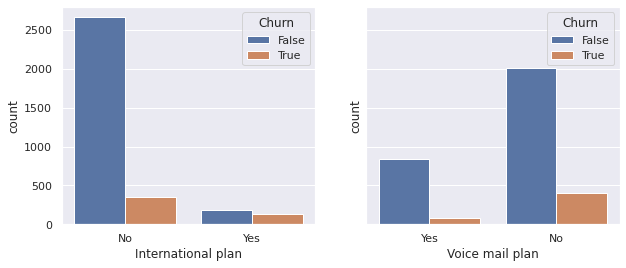

In [36]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sb.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sb.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

In [37]:
pd.crosstab(df['State'], df['Churn']).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


In [38]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


## 4. Whole dataset visualizations
## 4.1 Dimensionality reduction example


https://plot.ly/python/3d-scatter-plots/

## 4.2 Dimensionality reduction: PCA

In [40]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = df.loc[:, num_vars].values

# Separating out the target
y = df.loc[:,['Churn']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['Principal component 1', 'Principal component 2'])

finalDf = pd.concat([principalDf, df[['Churn']]], axis = 1)

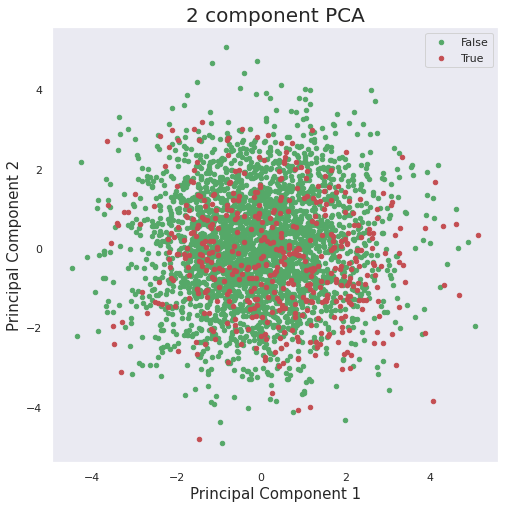

In [42]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [False, True]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Churn'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal component 1']
               , finalDf.loc[indicesToKeep, 'Principal component 2']
               , c = color
               , s = 20)
ax.legend(targets)
ax.grid()

## 4.3 t-SNE

In [43]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [44]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 26.1 s, sys: 62.6 ms, total: 26.2 s
Wall time: 6.93 s


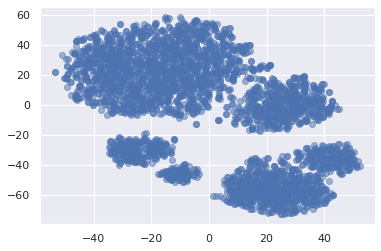

In [47]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

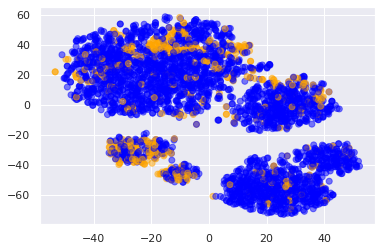

In [48]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['Churn'].map({False: 'blue', True: 'orange'}), alpha=.5);

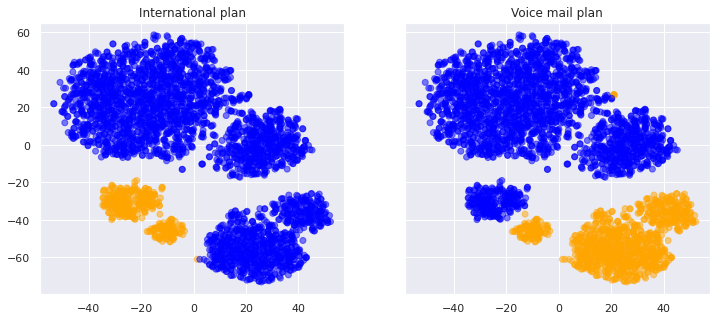

In [49]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
                    c=df[name].map({'Yes': 'orange', 'No': 'blue'}), alpha=.5);
    axes[i].set_title(name);

## 5. Specific techniques: Survival plots

In [46]:
# Ejecutar si da fallo en Colab
!pip install lifelines

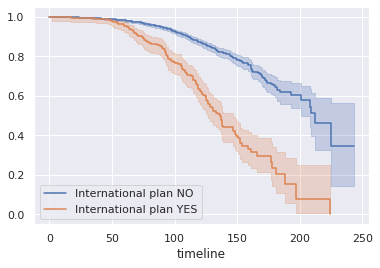

In [50]:
from lifelines import KaplanMeierFitter

kmf1 = KaplanMeierFitter() ## instantiate the class to create an object

## fit the model for 1st cohort
kmf1.fit(df['Account length'][df['International plan'] == 'No'], 
         df['Churn'][df['International plan'] == 'No'], 
         label='International plan NO')

a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(df['Account length'][df['International plan'] == 'Yes'], 
         df['Churn'][df['International plan'] == 'Yes'], 
         label='International plan YES')

g = kmf1.plot(ax=a1)

## 6. Useful resources
- The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-visual-data-analysis-in-python)
- ["Plotly for interactive plots"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/plotly_tutorial_for_interactive_plots_sankovalev.ipynb) - a tutorial by Alexander Kovalev within mlcourse.ai (full list of tutorials is [here](https://mlcourse.ai/tutorials))
- ["Bring your plots to life with Matplotlib animations"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/bring_your_plots_to_life_with_matplotlib_animations_kyriacos_kyriacou.ipynb) - a tutorial by Kyriacos Kyriacou within mlcourse.ai
- ["Some details on Matplotlib"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/some_details_in_matplotlib_pisarev_ivan.ipynb) - a tutorial by Ivan Pisarev within mlcourse.ai
- Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)
- Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-2-visual-data-analysis-in-python-846b989675cd) based on this notebook
- Course materials as a [Kaggle Dataset](https://www.kaggle.com/kashnitsky/mlcourse)
- If you read Russian: an [article](https://habrahabr.ru/company/ods/blog/323210/) on Habrahabr with ~ the same material. And a [lecture](https://youtu.be/vm63p8Od0bM) on YouTube
- Here is the official documentation for the libraries we used: [`matplotlib`](https://matplotlib.org/contents.html), [`seaborn`](https://seaborn.pydata.org/introduction.html) and [`pandas`](https://pandas.pydata.org/pandas-docs/stable/).
- The [gallery](http://seaborn.pydata.org/examples/index.html) of sample charts created with `seaborn` is a very good resource.
- Also, see the [documentation](http://scikit-learn.org/stable/modules/manifold.html) on Manifold Learning in `scikit-learn`.
- Efficient t-SNE implementation [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE).
- "How to Use t-SNE Effectively", [Distill.pub](https://distill.pub/2016/misread-tsne/).